# Spline interpolation from scratch

Example from Chapra & Canale, Ch. 18, Numerical Methods for Engineers

In [54]:
import numpy as np 
import matplotlib.pyplot as plt

## Input data set



In [55]:
x = np.array([3, 4.5, 7, 9])
fx = np.array([2.5, 1., 2.5, 0.5])

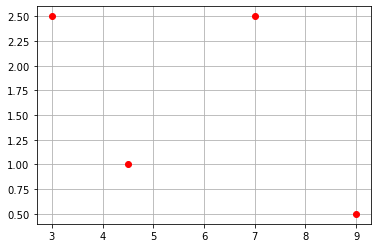

In [4]:
plt.plot(x, fx, 'ro') 
plt.grid() 

## Set up the matrix for equations

In [5]:
A = np.array([
[1, 0, 0, 0, 0, 0, 0, 0, 0],
[20.25, 4.5, 1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 20.25, 4.5, 1, 0, 0, 0],
[0, 0, 0, 49, 7, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 49, 7, 1],
[0, 0, 0, 14, 1, 0, -14, -1, 0],
[0, 0, 0, 0, 0, 0, 81, 9, 1],
[9, 1, 0, -9, -1, 0, 0, 0, 0],
[9, 3, 1, 0, 0, 0, 0, 0, 0]
])

In [17]:
# b-vector
b = np.array([0, 1, 1, 2.5, 2.5, 0, 0.5, 0, 2.5])

In [18]:
np.dot(np.linalg.inv(A), b)

array([ 7.19588997e-15, -1.00000000e+00,  5.50000000e+00,  6.40000000e-01,
       -6.76000000e+00,  1.84600000e+01, -1.60000000e+00,  2.46000000e+01,
       -9.13000000e+01])

In [19]:
a1, b1, c1, a2, b2, c2, a3, b3, c3 = np.linalg.solve(A, b)

In [20]:
def f1(x): 
    return a1*x**2 + b1*x + c1

def f2(x): 
    return a2*x**2 + b2*x + c2

def f3(x): 
    return a3*x**2 + b3*x + c3

In [21]:
f1(2)

3.5000000000000133

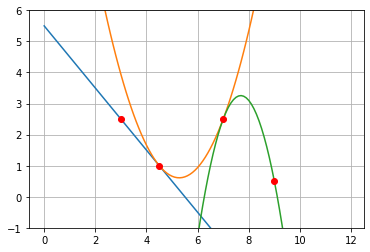

In [22]:
xvals = np.arange(0, 12, 0.1)

plt.plot(xvals, f1(xvals))
plt.plot(xvals, f2(xvals))
plt.plot(xvals, f3(xvals))

plt.plot(x, fx, 'ro')

plt.ylim([-1,6])

plt.grid() 

## Combine functions for correct intervals

In [23]:
x

array([3. , 4.5, 7. , 9. ])

In [41]:
# Combined function
def combined_function(x, intervals):
    if x <= intervals[1]:
        return f1(x)
    elif intervals[1] < x <= intervals[2]:
        return f2(x)
    else:
        return f3(x)


In [45]:
fx_combined = np.array([combined_function(x_val, x) for x_val in xvals])

In [49]:
fx_combined.shape, xvals.shape

((120,), (120,))

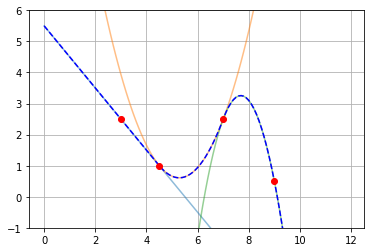

In [53]:
xvals = np.arange(0, 12, 0.1)

plt.plot(xvals, f1(xvals), alpha=0.5)
plt.plot(xvals, f2(xvals), alpha=0.5)
plt.plot(xvals, f3(xvals), alpha=0.5)

# combined function, only

plt.plot(xvals, fx_combined, 'b--')

plt.plot(x, fx, 'ro') 

plt.ylim([-1,6])

plt.grid() 